In [9]:
import pandas as pd
import numpy as np
import copy as cp
import matplotlib.pyplot as plt

import seaborn as sns
from typing import Tuple
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
def cross_val_predict(model, k, X, y) -> Tuple[np.array, np.array, np.array]:

    kfold = StratifiedKFold(n_splits=k)
    model_ = cp.deepcopy(model)
    acc_score = []
    pre_score = []
    # created scaler
    scaler = StandardScaler()
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X,y):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        # Fit on the train set only
        scaler.fit(train_X)
        # Apply to both the train set and the test set. 
        train_X = scaler.transform(train_X)
        test_X = scaler.transform(test_X)
      
        # Apply PCA
        pca = PCA()
        # Fit on the train set only
        pca.fit(train_X)
        # Apply transform to both the train set and the test set. 
        train_X = pca.transform(train_X)
        test_X = pca.transform(test_X)
        
    
        model_.fit(train_X, train_y)
        pred_values = model_.predict(test_X)
        acc = accuracy_score(pred_values , test_y)
        pre = precision_score(pred_values , test_y)
        acc_score.append(acc)
        pre_score.append(pre)
        predicted_classes = np.append(predicted_classes, pred_values)
        avg_acc_score = sum(acc_score)/k
        avg_pre_score = sum (pre_score)/k

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('precission of each fold - {}'.format(pre_score))
    print('Avg precission : {}'.format(avg_pre_score))

    return actual_classes, predicted_classes, predicted_proba

In [11]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
    plt.show()
  

In [12]:
dataframe = pd.read_csv('X_phrase.csv')
X = dataframe.iloc[:, 3:-2].values
y = dataframe.iloc [:, 6373]

k=10

accuracy of each fold - [0.9797979797979798, 0.9444444444444444, 0.9444444444444444, 0.9545454545454546, 0.9646464646464646, 0.9696969696969697, 0.9595959595959596, 0.9090909090909091, 0.9545454545454546, 0.9441624365482234]
Avg accuracy : 0.9524970517356305
precission of each fold - [0.972972972972973, 0.963963963963964, 0.954954954954955, 0.9819819819819819, 0.963963963963964, 0.990990990990991, 0.9819819819819819, 0.9099099099099099, 0.9818181818181818, 0.9181818181818182]
Avg precission : 0.9620720720720721


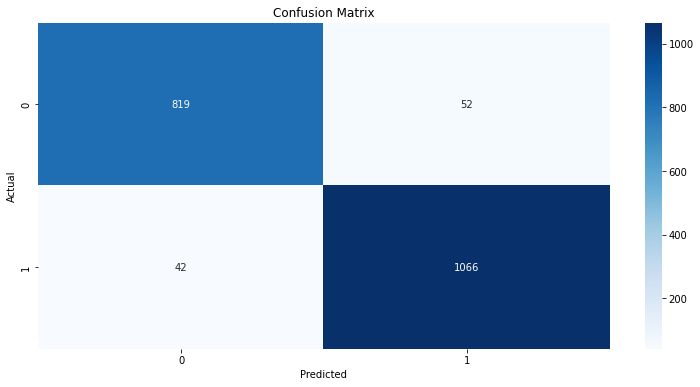

In [15]:
model =  svm.SVC(kernel='rbf', C=100)
actual_classes, predicted_classes, _ = cross_val_predict(model, k, X, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

In [4]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1974    0
1975    0
1976    0
1977    0
1978    0
Name: sex, Length: 1979, dtype: int64

In [8]:
X

,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,audspec_lengthL1norm_sma_percentile99.0,audspec_lengthL1norm_sma_pctlrange0-1,audspec_lengthL1norm_sma_stddev,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,0.507097,1.016541,1.474171,0.509443,0.457631,0.967074,0.078801,2.341328,2.262526,0.707928,...,5.137118,0.484740,2.470972,2.524355,-17.703860,0.622271,109.784035,47.911175,101.277450,51.647980
1,1.168364,1.814263,2.203301,0.645899,0.389037,1.034936,0.327280,4.384013,4.056732,1.152532,...,4.005127,0.440417,2.073513,2.141744,-16.199837,0.555773,105.480570,47.966680,94.085600,42.800450
2,1.180692,1.845594,2.988154,0.664902,1.142560,1.807462,0.131704,4.680020,4.548316,1.210892,...,7.184925,0.755057,2.611278,2.678902,-17.105988,0.272024,117.553770,63.893227,103.784280,47.551033
3,0.225694,0.457181,1.274626,0.231487,0.817446,1.048933,0.088235,1.570482,1.482247,0.531323,...,5.347836,0.563487,2.762490,2.731258,19.190212,0.367324,113.935120,46.438515,130.930340,52.362370
4,0.349862,0.773361,1.410235,0.423499,0.636875,1.060374,0.061305,2.716826,2.655520,0.761742,...,3.991856,0.542146,1.791496,1.985921,-9.214356,0.429345,80.406960,29.876451,83.139534,24.864147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,0.846460,1.507688,1.924948,0.661228,0.417260,1.078488,0.125980,3.287761,3.161781,0.827110,...,4.718318,0.417603,3.088735,2.816722,11.065202,0.510205,149.738740,48.358710,113.730290,55.329674
1975,0.880573,1.632141,2.263855,0.751569,0.631714,1.383283,0.190353,3.821733,3.631380,0.983967,...,3.956738,0.371842,2.459261,2.376929,16.129818,0.482733,92.878975,59.242340,120.960785,46.457336
1976,0.680910,1.041302,1.768127,0.360392,0.726825,1.087217,0.077080,4.096061,4.018982,0.994855,...,4.875783,0.512236,2.829606,2.838234,-19.976460,0.451588,102.013010,55.063267,60.555550,23.760225
1977,0.756430,1.271049,2.091416,0.514620,0.820367,1.334986,0.065222,3.813405,3.748182,1.009838,...,5.107675,0.551742,1.972706,1.801711,11.179843,0.482637,112.448710,45.028812,70.977640,42.937560
